<a href="https://colab.research.google.com/github/sepidehrezvani/10-/blob/main/simulation_of_article_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio torch-geometric torch-scatter torch-sparse torch-cluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.8 MB/s eta 0:00:00
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp312-cp312-linux_x86_64.whl size=664632 sha256=ea0c9e9149294244e1675a95f793e38ae4e553d521d090592a7c6bc843f88eab
  Stored in directory: /root/.cache/pip/wheels/84/20/50/44800723f57cd798630e77b3ec83bc80bd26a1e3dc3a672ef5
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp312-cp312-linux_x86_64.whl size=1222874 sha256=c760408540149f4a2c1478b53da082ac509bc97661988fbfa312e489015177ad
  Stored in direc

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class ResourceGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ResourceGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return torch.sigmoid(x)

In [3]:
from torch_geometric.data import Data

# تعداد کاربران و BS
num_users = 5
num_bs = 2
num_nodes = num_users + num_bs

# ویژگی‌های گره‌ها (مثلاً نیاز نرخ داده، توان)
x = torch.rand(num_nodes, 3)  # 3 ویژگی برای هر گره

# یال‌ها: ارتباط بین BS و کاربران
edge_index = torch.tensor([
    [0, 5, 1, 5, 2, 6, 3, 6, 4, 6],  # منبع
    [5, 0, 5, 1, 6, 2, 6, 3, 6, 4]   # مقصد
], dtype=torch.long)

data = Data(x=x, edge_index=edge_index)

In [4]:
model = ResourceGNN(input_dim=3, hidden_dim=16, output_dim=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# برچسب‌ها: تخصیص منابع مطلوب (اینجا تصادفی برای تست)
y = torch.rand(num_nodes, 1)

for epoch in range(50):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = loss_fn(out, y)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.1849
Epoch 10, Loss: 0.1332
Epoch 20, Loss: 0.1315
Epoch 30, Loss: 0.1282
Epoch 40, Loss: 0.1251


In [7]:
import matplotlib.pyplot as plt

Predicted Resource Allocation: [[0.39125776]
 [0.40104997]
 [0.40423298]
 [0.3983138 ]
 [0.5571601 ]
 [0.38086626]
 [0.4782827 ]]


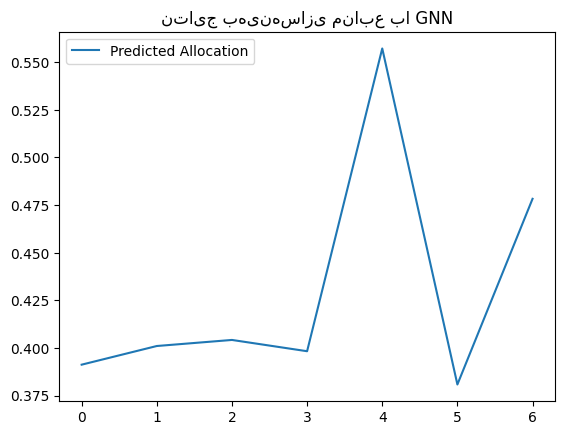

In [8]:
import matplotlib.pyplot as plt

print("Predicted Resource Allocation:", out)

plt.plot(out, label="Predicted Allocation")
plt.legend()
plt.title("نتایج بهینه‌سازی منابع با GNN")
plt.show()